Given some info about an a desired route, can we predict the airfare of the route?

In [ ]:
!wget https://raw.githubusercontent.com/Speeb04/SDSS-Datathon/refs/heads/main/Resources/Cases/Airline%20Tickets/final_output_data.csv

--2026-03-01 16:18:01--  https://raw.githubusercontent.com/Speeb04/SDSS-Datathon/refs/heads/main/Resources/Cases/Airline%20Tickets/final_output_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9120768 (8.7M) [text/plain]
Saving to: ‘final_output_data.csv.2’

final_output_data.c 100%[===================>]   8.70M  --.-KB/s    in 0.09s   

2026-03-01 16:18:02 (91.6 MB/s) - ‘final_output_data.csv.2’ saved [9120768/9120768]



In [ ]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd             # For manipulating tabular data
import sklearn

Read in the CV and display the data

In [ ]:
data = pd.read_csv("final_output_data.csv")
data.describe()

,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,large_ms,lf_ms,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,...,city1_gdp_2014,city2_gdp_2014,city1_gdp_2015,city2_gdp_2015,city1_gdp_2016,city2_gdp_2016,city1_gdp_2017,city2_gdp_2017,city1_gdp_2018,city2_gdp_2018
count,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,1.399700e+04,13997.000000,13997.000000,...,1.384400e+04,1.396300e+04,1.384400e+04,1.396300e+04,1.384400e+04,1.396300e+04,1.384400e+04,1.396300e+04,1.400400e+04,1.400400e+04
mean,2023.285633,2.357112,31506.638889,32300.714296,1061.839617,0.566322,0.327737,3.220308e+06,0.836383,-0.007360,...,2.572814e+08,2.598469e+08,2.664354e+08,2.683597e+08,2.712902e+08,2.738740e+08,2.783004e+08,2.813870e+08,2.829070e+08,2.893308e+08
std,1.030128,1.108776,1214.185463,1421.194815,589.956663,0.174240,0.228027,2.319576e+06,0.141082,0.108333,...,2.810829e+08,3.095763e+08,2.884793e+08,3.167918e+08,2.925929e+08,3.218508e+08,2.992225e+08,3.292014e+08,3.052658e+08,3.356226e+08
min,2022.000000,1.000000,30135.000000,30189.000000,129.000000,0.209700,0.010000,2.993000e+04,0.000000,-0.619400,...,4.038099e+06,4.038099e+06,4.252418e+06,4.252418e+06,4.409773e+06,4.409773e+06,4.518513e+06,4.518513e+06,1.592100e+04,2.257100e+04
25%,2022.000000,1.000000,30529.000000,30852.000000,604.000000,0.431800,0.154500,1.224800e+06,0.793600,-0.051600,...,8.721056e+07,8.585064e+07,8.926822e+07,8.734042e+07,8.920767e+07,8.684465e+07,9.047370e+07,8.780125e+07,8.977556e+07,8.977556e+07
50%,2023.000000,2.000000,31057.000000,32211.000000,936.000000,0.541600,0.265550,2.873210e+06,0.865900,-0.003200,...,1.304346e+08,1.296458e+08,1.368790e+08,1.324822e+08,1.390871e+08,1.379909e+08,1.438360e+08,1.436806e+08,1.468139e+08,1.500331e+08
75%,2024.000000,3.000000,32244.000000,33342.000000,1404.000000,0.676725,0.444300,4.254110e+06,0.922500,0.048400,...,3.657951e+08,3.738171e+08,3.812879e+08,3.835594e+08,3.890809e+08,3.893891e+08,3.993607e+08,3.887911e+08,4.128558e+08,3.986744e+08
max,2025.000000,4.000000,35412.000000,35628.000000,2724.000000,1.000000,1.000000,8.840080e+06,1.000000,0.965900,...,1.432602e+09,1.432602e+09,1.458929e+09,1.458929e+09,1.480027e+09,1.480027e+09,1.508145e+09,1.508145e+09,1.532202e+09,1.532202e+09


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Display data head and columns to confirm target variable and features
print("Data Head:")
display(data.head())
print("\nData Columns:")
print(data.columns)

Data Head:


,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,city1_pop_2020,city2_pop_2020,city1_pop_2021,city2_pop_2021,city1_pop_2022,city2_pop_2022,city1_pop_2023,city2_pop_2023,city1_pop_2024,city2_pop_2024
0,2025,2,32467,31703,"Miami, FL","New York City, NY",1118,"17,955",$208.52,B6,...,"442,828","8,740,306","441,630","8,453,772","456,736","8,356,179","470,677","8,390,888","487,014","8,478,072"
1,2025,2,32575,32457,"Los Angeles, CA","San Francisco, CA",372,"17,310",$157.68,WN,...,"3,896,329","874,826","3,830,987","815,498","3,832,998","814,176","3,847,428","819,151","3,878,704","827,526"
2,2025,2,32575,31703,"Los Angeles, CA","New York City, NY",2510,"13,648",$430.38,DL,...,"3,896,329","8,740,306","3,830,987","8,453,772","3,832,998","8,356,179","3,847,428","8,390,888","3,878,704","8,478,072"
3,2025,2,31703,31454,"New York City, NY","Orlando, FL",989,"12,627",$186.50,B6,...,"8,740,306","307,868","8,453,772","309,928","8,356,179","318,821","8,390,888","327,390","8,478,072","334,854"
4,2025,2,30977,31703,"Chicago, IL","New York City, NY",773,"11,284",$221.33,UA,...,"2,745,196","8,740,306","2,706,324","8,453,772","2,684,076","8,356,179","2,699,144","8,390,888","2,721,308","8,478,072"



Data Columns:
Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'TotalFaredPax_city1',
       'TotalPerLFMkts_city1', 'TotalPerPrem_city1', 'TotalFaredPax_city2',
       'TotalPerLFMkts_city2', 'TotalPerPrem_city2', 'city1_is_hub',
       'city2_is_hub', 'carrier_lg_is_full_service', 'carrier_low_is_low_cost',
       'city1_gdp_2001', 'city2_gdp_2001', 'city1_gdp_2002', 'city2_gdp_2002',
       'city1_gdp_2003', 'city2_gdp_2003', 'city1_gdp_2004', 'city2_gdp_2004',
       'city1_gdp_2005', 'city2_gdp_2005', 'city1_gdp_2006', 'city2_gdp_2006',
       'city1_gdp_2007', 'city2_gdp_2007', 'city1_gdp_2008', 'city2_gdp_2008',
       'city1_gdp_2009', 'city2_gdp_2009', 'city1_gdp_2010', 'city2_gdp_2010',
       'city1_gdp_2011', 'city2_gdp_2011', 'city1_gdp_2012', 'city2_gdp_2012',
       'city1_gdp_2013', 'city2_gdp_2013', 'city1_gdp_2014', 'c

From the column names and description, `TotalPerLFMkts_city1` is chosen as the target variable representing the fare price. The features are selected based on your description and available columns. Categorical features like `Year`, `quarter`, `citymarketid_1`, and `citymarketid_2` will be one-hot encoded.

Numerical Columns: ['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'fare', 'fare_lg', 'fare_low', 'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1', 'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2', 'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024']


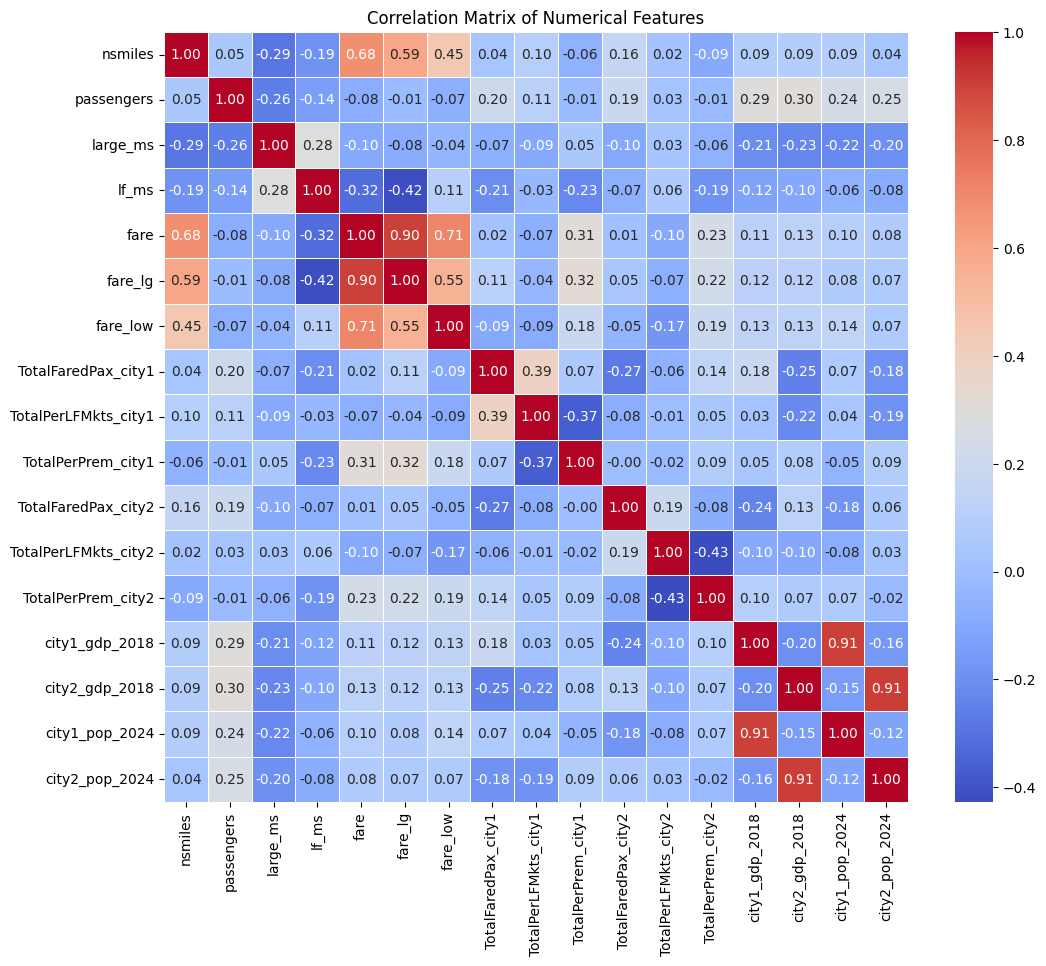

In [ ]:
df = data
# Re-apply necessary initial cleaning steps, *before* one-hot encoding city1/city2
# 1. Drop columns with 100% missing values
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})
columns_to_drop = missing_info[missing_info['Missing Percentage'] == 100].index.tolist()
df = df.drop(columns=columns_to_drop)


for col in ['city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024']:
  df[col] = df[col].astype(str).str.replace(',', '', regex=False)
  df[col] = df[col].replace('nan', np.nan)
  df[col] = pd.to_numeric(df[col])

# 2. Impute small percentage missing numerical values
columns_to_impute = [
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2',
    'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
]
for col in columns_to_impute:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# 3. Clean and convert 'fare', 'passengers', 'fare_lg', 'fare_low' to numerical types
df['fare'] = df['fare'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['fare'] = pd.to_numeric(df['fare'])

df['passengers'] = df['passengers'].astype(str).str.replace(',', '', regex=False)
df['passengers'] = pd.to_numeric(df['passengers']).astype(int)

df['fare_lg'] = df['fare_lg'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['fare_lg'] = pd.to_numeric(df['fare_lg'])

df['fare_low'] = df['fare_low'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['fare_low'] = pd.to_numeric(df['fare_low'])

import seaborn as sns
numerical_cols = [
    'nsmiles', 'passengers', 'large_ms', 'lf_ms',
    'fare', 'fare_lg', 'fare_low',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2',
    'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
]

print("Numerical Columns:", numerical_cols)
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# Now, create the 'route' column
df['route'] = df.apply(lambda row: '-'.join(sorted([row['city1'], row['city2']])), axis=1)

# Calculate the frequency of each route
route_counts = df['route'].value_counts()

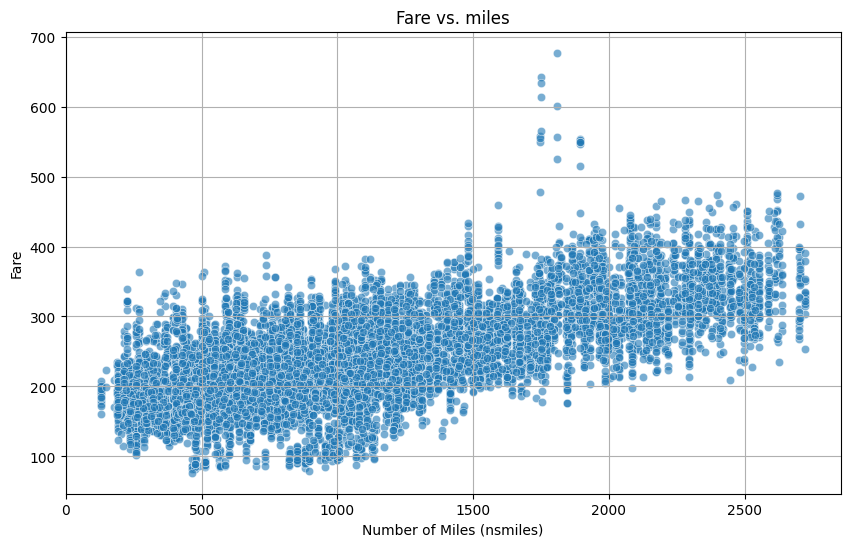

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='nsmiles', y='fare', data=df, alpha=0.6)
plt.title('Fare vs. miles')
plt.xlabel('Number of Miles (nsmiles)')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

/tmp/ipython-input-367/645631038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='fare', data=df, palette='viridis')


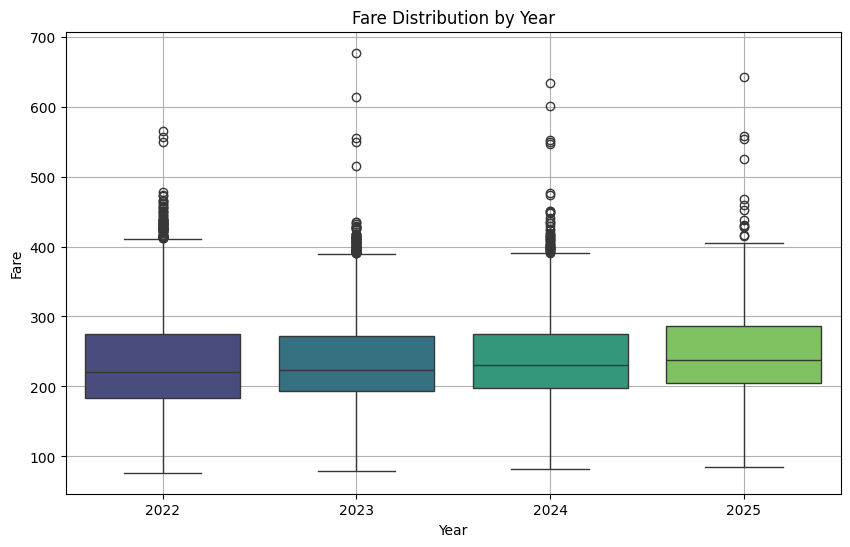

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='fare', data=df, palette='viridis')
plt.title('Fare Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

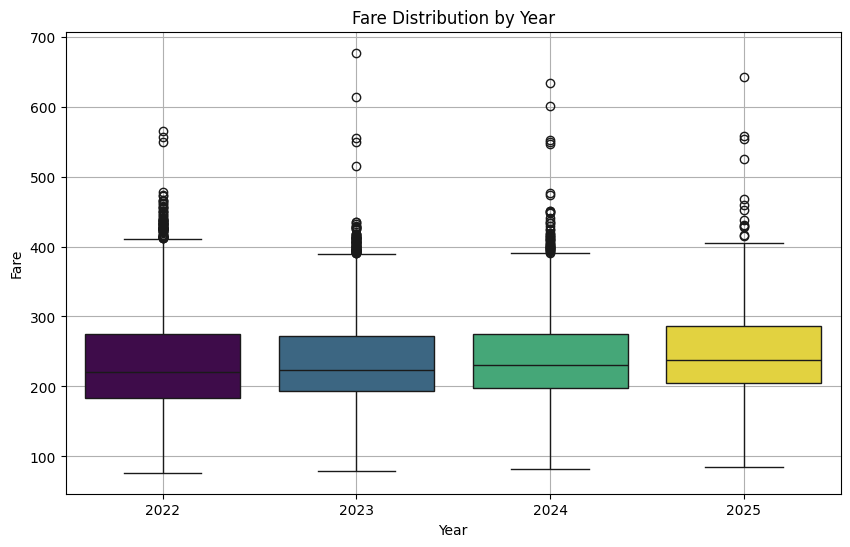

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='fare', data=df, hue='Year', palette='viridis', legend=False) # Fixed: Added hue='Year' and legend=False
plt.title('Fare Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

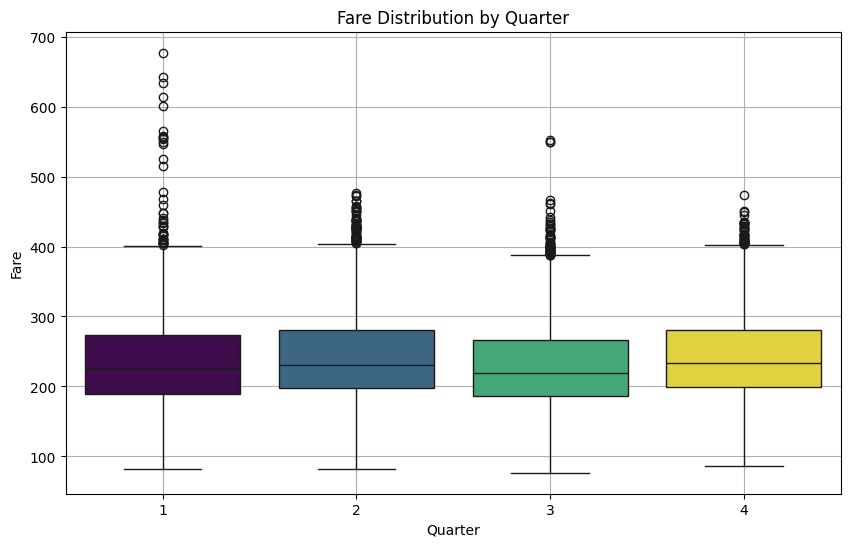

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='fare', data=df, hue='quarter', palette='viridis', legend=False)
plt.title('Fare Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

In [ ]:
y = df['fare']
raw_X = df.drop(columns=['fare', 'fare_lg', 'fare_low', 'citymarketid_1',
                     'citymarketid_2'])

X = raw_X[['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'Year', 'quarter','city1', 'city2', 'carrier_lg', 'carrier_low',
      'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2', 'route']]
X = pd.get_dummies(X, columns=['quarter', 'carrier_lg', 'carrier_low', 'city1', 'city2', 'route'], drop_first=True, dtype=int)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X.head())
print("First 5 values of y:\n", y.head())

# # Convert categorical features to one-hot encoding
# X = pd.get_dummies(X, columns=['Year', 'quarter', 'citymarketid_1', 'citymarketid_2'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")




Shape of X: (14004, 1505)
Shape of y: (14004,)
First 5 rows of X:
    nsmiles  passengers  large_ms   lf_ms  Year  city1_gdp_2018  \
0     1118       17955    0.2551  0.2551  2025       315031150   
1      372       17310    0.5006  0.1193  2025       941064112   
2     2510       13648    0.2535  0.2272  2025       941064112   
3      989       12627    0.3735  0.3735  2025      1532202227   
4      773       11284    0.4328  0.2426  2025       611591128   

   city2_gdp_2018  city1_pop_2024  city2_pop_2024  TotalFaredPax_city1  ...  \
0      1532202227        487014.0       8478072.0          4322090.000  ...   
1       497195398       3878704.0        827526.0          2822942.000  ...   
2      1532202227       3878704.0       8478072.0          2822942.000  ...   
3       124173982       8478072.0        334854.0          2978413.333  ...   
4      1532202227       2721308.0       8478072.0          5402975.000  ...   

   route_St. Louis, MO-Tampa, FL  route_St. Louis, MO-Washing

Now, let's train a Linear Regression model using the processed data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Initialize and train the Linear Regression model
# model = DecisionTreeRegressor(criterion="squared_error", max_depth=60)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, model.predict(X_train))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
# plt.figure(figsize=(20, 10))
# plot_tree(model, feature_names=X.columns, filled=True, rounded=True, max_depth = 2)
# plt.show()

KeyboardInterrupt: 

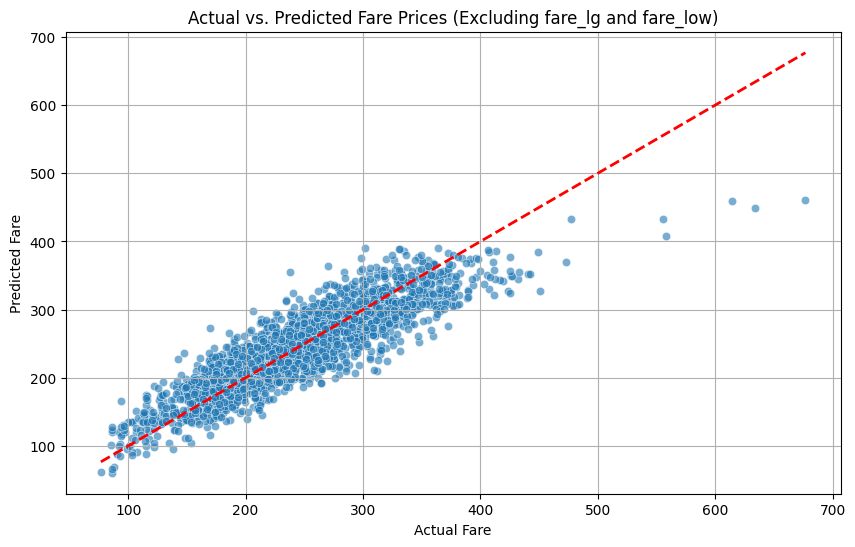

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Prices (Excluding fare_lg and fare_low)')
plt.grid(True)
plt.show()

We additionally want city attributes such as whether the city is a hub for full service airlines, the GDP of the city, population of the city, GDP p/c, etc.

For flights, we would also like to know which month of the year the flight occured.

Features:
Past fares for the route (continuous)

Quarter of the year (1-hot)

Distance (continuous)

Passenger count for the route (discrete)

Airline market share (continuous)

For each origin and destination:

City name (1-hot)

Is the city an air hub? (T/F)

GDP of the city (discrete)

Population (discrete)

GDP per capita (discrete)


Now, we get rid of the total covariates, and that is hindsight statistics.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = raw_X[['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'Year', 'quarter', 'carrier_lg', 'carrier_low',
      'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2']]
X = pd.get_dummies(X, columns=['quarter', 'carrier_lg', 'carrier_low',], drop_first=True, dtype=int)

# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X[:5]) # Changed .head() to slicing
print("First 5 values of y:\n", y.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X: (14004, 42)
Shape of y: (14004,)
First 5 rows of X:
 [[ 9.51974806e-02  1.14710276e+01 -1.78622959e+00 -3.18558239e-01
   1.66428723e+00  1.05237227e-01  3.70331335e+00 -4.13238628e-01
   4.18691045e+00  4.75200756e-01  3.50972485e-01 -5.39616296e-01
   1.15054070e-02 -8.13373573e-02  4.75413429e-02  1.58062526e+00
  -5.22248789e-01 -5.22138042e-01 -2.72801660e-01  4.80658613e+00
  -4.97454772e-01 -1.29791271e-01 -1.72792743e-01 -8.93847586e-02
  -1.33994388e-01 -5.98598526e-02 -3.95473981e-01 -6.14216573e-01
  -7.03673278e-02 -2.57056324e-01 -2.21511503e-01  3.95871552e+00
  -1.55108030e-01 -3.79505179e-01 -2.61759882e-01 -2.07034457e-02
  -1.41791731e-01 -3.80489602e-01 -1.67008848e-01 -1.67008848e-01
  -8.29728559e-01 -9.25764533e-02]
 [-1.16934733e+00  1.10340146e+01 -3.77205412e-01 -9.14122870e-01
   1.66428723e+00  2.15609038e+00  6.19362253e-01  1.79470030e+00
  -1.69162349e-01 -1.71282780e-01  2.03357657e-01 -2.83481012e-01
   1.63748851e-01  3.37609603e-01 -1.07826

In [ ]:
from sklearn.preprocessing import StandardScaler

X = raw_X[['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'Year', 'quarter', 'carrier_lg', 'carrier_low',
      'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2']]
X = pd.get_dummies(X, columns=['quarter', 'carrier_lg', 'carrier_low',], drop_first=True, dtype=int)

# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X[:5]) # Changed .head() to slicing
print("First 5 values of y:\n", y.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X: (14004, 42)
Shape of y: (14004,)
First 5 rows of X:
 [[ 9.51974806e-02  1.14710276e+01 -1.78622959e+00 -3.18558239e-01
   1.66428723e+00  1.05237227e-01  3.70331335e+00 -4.13238628e-01
   4.18691045e+00  4.75200756e-01  3.50972485e-01 -5.39616296e-01
   1.15054070e-02 -8.13373573e-02  4.75413429e-02  1.58062526e+00
  -5.22248789e-01 -5.22138042e-01 -2.72801660e-01  4.80658613e+00
  -4.97454772e-01 -1.29791271e-01 -1.72792743e-01 -8.93847586e-02
  -1.33994388e-01 -5.98598526e-02 -3.95473981e-01 -6.14216573e-01
  -7.03673278e-02 -2.57056324e-01 -2.21511503e-01  3.95871552e+00
  -1.55108030e-01 -3.79505179e-01 -2.61759882e-01 -2.07034457e-02
  -1.41791731e-01 -3.80489602e-01 -1.67008848e-01 -1.67008848e-01
  -8.29728559e-01 -9.25764533e-02]
 [-1.16934733e+00  1.10340146e+01 -3.77205412e-01 -9.14122870e-01
   1.66428723e+00  2.15609038e+00  6.19362253e-01  1.79470030e+00
  -1.69162349e-01 -1.71282780e-01  2.03357657e-01 -2.83481012e-01
   1.63748851e-01  3.37609603e-01 -1.07826

In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation (after excluding fare_lg and fare_low and with normalized data):\n")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation (after excluding fare_lg and fare_low and with normalized data):

Mean Absolute Error (MAE): 22.86
Mean Squared Error (MSE): 893.80
Root Mean Squared Error (RMSE): 29.90
R-squared (R2): 0.78


**Reasoning**:
To visually assess the performance of the re-trained Linear Regression model on normalized data, I will create a scatter plot of actual versus predicted fare prices, including a perfect prediction line for reference.



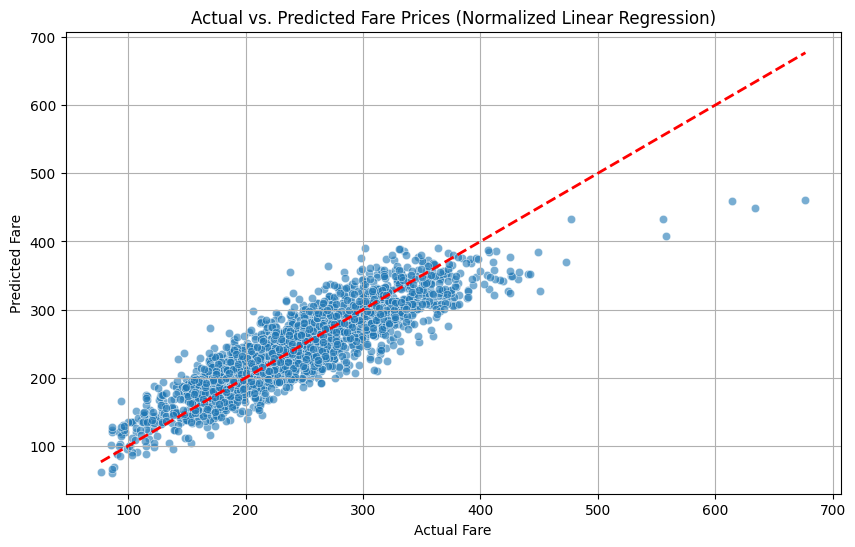

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Prices (Normalized Linear Regression)')
plt.grid(True)
plt.show()

In [ ]:
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients (first 10, for brevity):\n", model.coef_[:10])

# Create a DataFrame to map coefficients to their feature names
# Note: After StandardScaler, X is a NumPy array, so we need the original column names for mapping
# The original column names are from X before scaling, but after get_dummies.
# We can reuse the X before scaling from the previous cell's `pd.get_dummies` step
# Recreate X from raw_X and apply get_dummies to get column names
original_X_for_columns = raw_X[['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'Year', 'quarter', 'carrier_lg', 'carrier_low',
      'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2']]
original_X_for_columns = pd.get_dummies(original_X_for_columns, columns=['quarter', 'carrier_lg', 'carrier_low',], drop_first=True, dtype=int)

coefficients_df = pd.DataFrame({'Feature': original_X_for_columns.columns, 'Coefficient': model.coef_})
print("\nAll Coefficients (first 20):\n")
display(coefficients_df.head(20))
print("\nAll Coefficients (last 20):\n")
display(coefficients_df.tail(20))

Intercept: 237.84
Coefficients (first 10, for brevity):
 [49.22958598 -3.8440022   8.56306435 -7.2295118   3.16165594 -1.8933347
  0.85345679  3.93116843  1.21361011 -6.53694687]

All Coefficients (first 20):



,Feature,Coefficient
0,nsmiles,49.229586
1,passengers,-3.844002
2,large_ms,8.563064
3,lf_ms,-7.229512
4,Year,3.161656
5,city1_gdp_2018,-1.893335
6,city2_gdp_2018,0.853457
7,city1_pop_2024,3.931168
8,city2_pop_2024,1.213610
9,TotalFaredPax_city1,-6.536947



All Coefficients (last 20):



,Feature,Coefficient
22,carrier_lg_G4,-6.342264
23,carrier_lg_MX,-2.695926
24,carrier_lg_NK,-4.364714
25,carrier_lg_SY,-2.698546
26,carrier_lg_UA,-1.424375
27,carrier_lg_WN,-4.569128
28,carrier_lg_XP,-3.552166
29,carrier_low_AA,0.186064
30,carrier_low_AS,-0.323534
31,carrier_low_B6,-5.004241



Top 10 Features by Absolute Coefficient Value (Linear Regression):



,Feature,Coefficient,Abs_Coefficient
0,nsmiles,49.229586,49.229586
11,TotalPerPrem_city1,13.742409,13.742409
14,TotalPerPrem_city2,12.353672,12.353672
2,large_ms,8.563064,8.563064
37,carrier_low_NK,-7.252998,7.252998
3,lf_ms,-7.229512,7.229512
18,carrier_lg_AS,-6.592655,6.592655
9,TotalFaredPax_city1,-6.536947,6.536947
22,carrier_lg_G4,-6.342264,6.342264
17,quarter_4,6.057303,6.057303


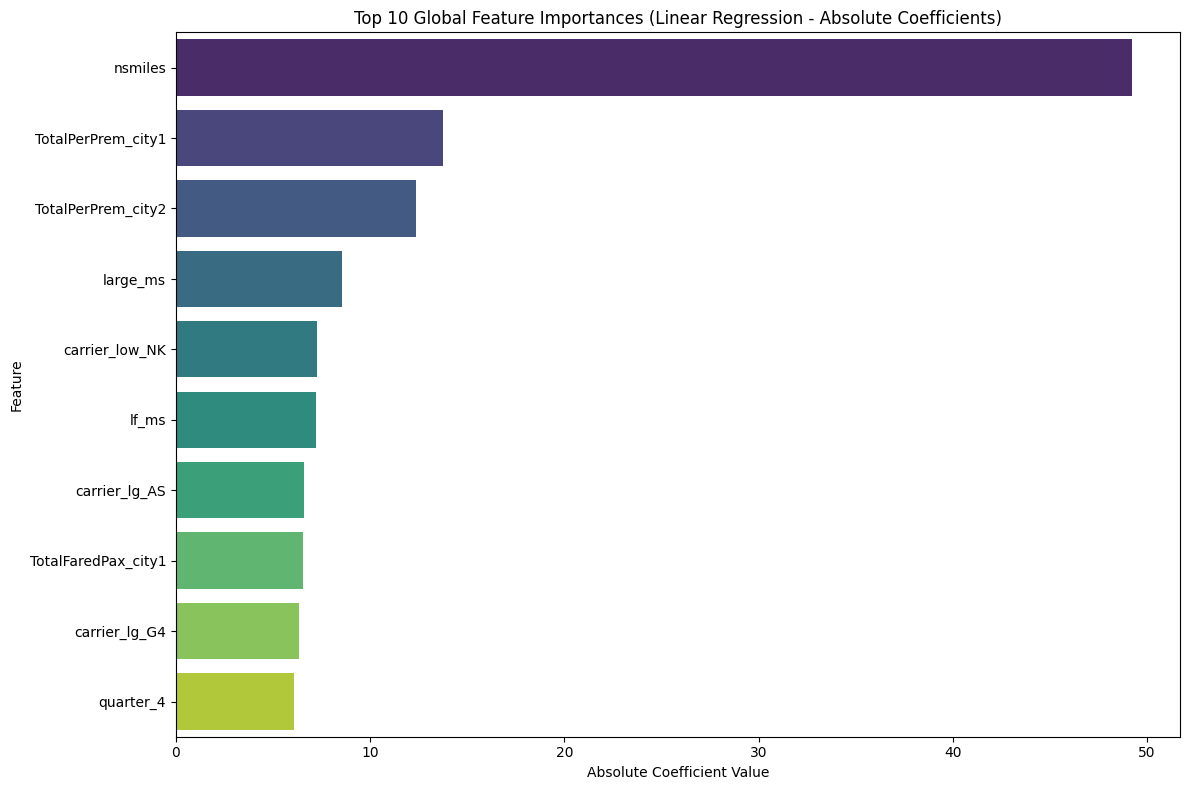

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate absolute coefficients
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()

# Sort by absolute coefficient in descending order and get the top 10
top_10_abs_coefficients = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

print("\nTop 10 Features by Absolute Coefficient Value (Linear Regression):\n")
display(top_10_abs_coefficients)

# Visualize the top 10 features by absolute coefficient
plt.figure(figsize=(12, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_10_abs_coefficients, hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Global Feature Importances (Linear Regression - Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Build NN


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Get the number of features for the input layer
input_features = X_train.shape[1]

# Initialize the Sequential model
model_nn = Sequential()

# Add the Input layer explicitly
model_nn.add(Input(shape=(input_features,)))

# Add the first hidden layer
model_nn.add(Dense(64, activation='relu'))

# Add another hidden layer
model_nn.add(Dense(32, activation='relu'))


# Add the output layer (1 neuron for regression, no activation)
model_nn.add(Dense(1))

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

print("Neural network model defined and compiled successfully.")
model_nn.summary()

Neural network model defined and compiled successfully.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train Neural Network Model

Train the neural network model using the preprocessed training data and monitor its performance.


In [ ]:
history = model_nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

print("Neural network model trained successfully.")
print("Training history stored.")

Neural network model trained successfully.
Training history stored.


## Evaluate Neural Network Performance

### Subtask:
Make predictions on the test set using the trained neural network, evaluate its performance using metrics like R-squared, MAE, and MSE, and visualize the actual versus predicted values.


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Neural Network Model Evaluation:

Mean Absolute Error (MAE): 16.10
Mean Squared Error (MSE): 452.63
Root Mean Squared Error (RMSE): 21.28
R-squared (R2): 0.89


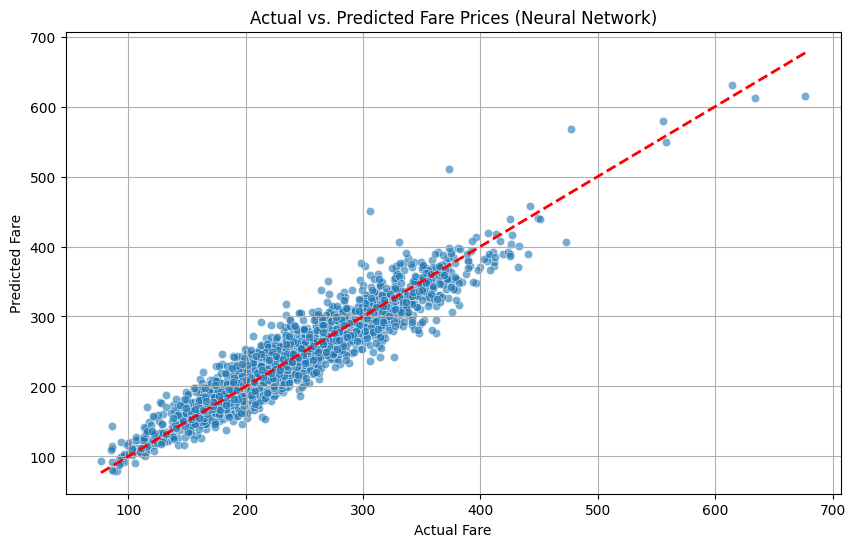

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set using the trained neural network
y_pred_nn = model_nn.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\nNeural Network Model Evaluation:\n")
print(f"Mean Absolute Error (MAE): {mae_nn:.2f}")
print(f"Mean Squared Error (MSE): {mse_nn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn:.2f}")
print(f"R-squared (R2): {r2_nn:.2f}")

# Visualize predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_nn.flatten(), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Prices (Neural Network)')
plt.grid(True)
plt.show()

# Build TabNet (https://www.kaggle.com/code/enigmak/tabnet-deep-neural-network-for-tabular-data)

In [ ]:
get_ipython().system('pip install pytorch-tabnet')

print("pytorch-tabnet installed successfully.")


pytorch-tabnet installed successfully.


In [ ]:
X = raw_X[['nsmiles', 'passengers', 'large_ms', 'lf_ms', 'Year', 'quarter', 'carrier_lg', 'carrier_low',
      'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2']]
X = pd.get_dummies(X, columns=['quarter', 'carrier_lg', 'carrier_low',], drop_first=True, dtype=int)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X.head())
print("First 5 values of y:\n", y.head())

# # Convert categorical features to one-hot encoding
# X = pd.get_dummies(X, columns=['Year', 'quarter', 'citymarketid_1', 'citymarketid_2'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X: (14004, 42)
Shape of y: (14004,)
First 5 rows of X:
    nsmiles  passengers  large_ms   lf_ms  Year  city1_gdp_2018  \
0     1118       17955    0.2551  0.2551  2025       315031150   
1      372       17310    0.5006  0.1193  2025       941064112   
2     2510       13648    0.2535  0.2272  2025       941064112   
3      989       12627    0.3735  0.3735  2025      1532202227   
4      773       11284    0.4328  0.2426  2025       611591128   

   city2_gdp_2018  city1_pop_2024  city2_pop_2024  TotalFaredPax_city1  ...  \
0      1532202227        487014.0       8478072.0          4322090.000  ...   
1       497195398       3878704.0        827526.0          2822942.000  ...   
2      1532202227       3878704.0       8478072.0          2822942.000  ...   
3       124173982       8478072.0        334854.0          2978413.333  ...   
4      1532202227       2721308.0       8478072.0          5402975.000  ...   

   carrier_low_DL  carrier_low_F9  carrier_low_G4  carrier_low_

In [ ]:
raw_df = pd.read_csv("final_output_data.csv")

In [ ]:
import numpy as np

# 1. Define TARGET_COL
TARGET_COL = 'fare'

# 2. Define CATEGORICAL_COLS
CATEGORICAL_COLS = ['quarter', 'carrier_lg', 'carrier_low']

# 3. Define CONTINUOUS_COLS
CONTINUOUS_COLS = [
    'Year', 'nsmiles', 'passengers', 'large_ms', 'lf_ms',
    'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2'
]

# 4. Define ALL_FEATURES
ALL_FEATURES = CATEGORICAL_COLS + CONTINUOUS_COLS

# 5. Define prepare_data_tabnet function
def prepare_data_tabnet(df_input):
    df = df_input.copy() # a. Create a copy of the input DataFrame

    # b. Identify and drop columns with 100% missing values
    missing_values_count = df.isnull().sum()
    missing_values_percentage = (df.isnull().sum() / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Count': missing_values_count,
        'Missing Percentage': missing_values_percentage
    })
    columns_to_drop_100_missing = missing_info[missing_info['Missing Percentage'] == 100].index.tolist()
    df = df.drop(columns=columns_to_drop_100_missing)

    for col in ['city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024']:
      df[col] = df[col].astype(str).str.replace(',', '', regex=False)
      df[col] = df[col].replace('nan', np.nan)
      df[col] = pd.to_numeric(df[col])

    # c. Impute missing values in specified numerical columns using their respective medians


    columns_to_impute = [
        'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
        'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2',
        'city1_gdp_2018', 'city2_gdp_2018', 'city1_pop_2024', 'city2_pop_2024',
    ]

    for col in columns_to_impute:
        if df[col].isnull().any():
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)

    # d. Clean and convert 'fare', 'passengers', 'fare_lg', 'fare_low' to numerical types
    for col_name in ['fare', 'passengers', 'fare_lg', 'fare_low']:
        # Ensure the column exists before processing
        if col_name in df.columns:
            df[col_name] = df[col_name].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
            if col_name == 'passengers':
                df[col_name] = pd.to_numeric(df[col_name]).astype(int)
            else:
                df[col_name] = pd.to_numeric(df[col_name])

    # e. Ensure 'Year' is of integer type
    if 'Year' in df.columns:
        df['Year'] = df['Year'].astype(int)

    # g. Apply a log transformation to the 'fare' column for the target variable
    if TARGET_COL in df.columns:
        df[TARGET_COL] = np.log1p(df[TARGET_COL])

    # h. Identify the indices and number of unique categories for each categorical column for TabNet
    cat_idxs = [i for i, f in enumerate(ALL_FEATURES) if f in CATEGORICAL_COLS]
    cat_dims = [df[f].nunique() for f in CATEGORICAL_COLS]

    # i. Convert categorical features to integer codes
    for col in CATEGORICAL_COLS:
        df[col] = df[col].astype('category').cat.codes

    # Ensure order of columns for TabNet
    df_prepared = df[ALL_FEATURES + [TARGET_COL]]

    # j. Return the prepared DataFrame, cat_idxs, and cat_dims
    return df_prepared, cat_idxs, cat_dims

print("Data preparation components (lists and function) defined successfully.")

Data preparation components (lists and function) defined successfully.


## Prepare Data for TabNet

Load and process again since tabnet uses entity embeddings and previous data has been processed with one hot encoding.


In [ ]:
df_clean, cat_idxs, cat_dims = prepare_data_tabnet(raw_df)

print("Head of df_clean after TabNet preprocessing:")
print(df_clean.head())

print("\nCategoric~al Indices (cat_idxs):")
print(cat_idxs)

print("\nCategorical Dimensions (cat_dims):")
print(cat_dims)

Head of df_clean after TabNet preprocessing:
   quarter  carrier_lg  carrier_low  Year  nsmiles  passengers  large_ms  \
0        1           2            3  2025     1118       17955    0.2551   
1        1          10            2  2025      372       17310    0.5006   
2        1           3            3  2025     2510       13648    0.2535   
3        1           2            3  2025      989       12627    0.3735   
4        1           9            1  2025      773       11284    0.4328   

    lf_ms  city1_gdp_2018  city2_gdp_2018  city1_pop_2024  city2_pop_2024  \
0  0.2551       315031150      1532202227        487014.0       8478072.0   
1  0.1193       941064112       497195398       3878704.0        827526.0   
2  0.2272       941064112      1532202227       3878704.0       8478072.0   
3  0.3735      1532202227       124173982       8478072.0        334854.0   
4  0.2426       611591128      1532202227       2721308.0       8478072.0   

   TotalFaredPax_city1  TotalPerLFM

In [ ]:
X

,nsmiles,passengers,large_ms,lf_ms,Year,city1_gdp_2018,city2_gdp_2018,city1_pop_2024,city2_pop_2024,TotalFaredPax_city1,...,carrier_low_DL,carrier_low_F9,carrier_low_G4,carrier_low_HA,carrier_low_MX,carrier_low_NK,carrier_low_SY,carrier_low_UA,carrier_low_WN,carrier_low_XP
0,1118,17955,0.2551,0.2551,2025,315031150,1532202227,487014.0,8478072.0,4322090.000,...,0,0,0,0,0,0,0,0,0,0
1,372,17310,0.5006,0.1193,2025,941064112,497195398,3878704.0,827526.0,2822942.000,...,0,0,0,0,0,0,0,0,0,0
2,2510,13648,0.2535,0.2272,2025,941064112,1532202227,3878704.0,8478072.0,2822942.000,...,0,0,0,0,0,0,0,0,0,0
3,989,12627,0.3735,0.3735,2025,1532202227,124173982,8478072.0,334854.0,2978413.333,...,0,0,0,0,0,0,0,0,0,0
4,773,11284,0.4328,0.2426,2025,611591128,1532202227,2721308.0,8478072.0,5402975.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,1991,163,0.3261,0.1021,2022,412855824,92802,673458.0,57894.0,1584666.667,...,0,0,0,0,0,0,0,0,0,0
14000,945,163,0.6251,0.2870,2022,445335360,40011352,2390125.0,554013.0,2101435.000,...,0,0,0,0,0,0,0,0,1,0
14001,314,163,0.9133,0.9133,2022,43436946,219361505,550105.0,1404452.0,240180.000,...,0,0,0,0,0,0,0,0,0,0
14002,685,163,0.5775,0.5775,2022,468918434,7606775,1008106.0,37024.0,3003365.000,...,0,0,0,0,0,0,0,0,1,0


## Create Data Arrays

### Subtask:
Split the `df_clean` into training (`X_train`, `y_train`) and validation (`X_val`, `y_val`) NumPy arrays, suitable for direct input into the `pytorch-tabnet` model.


**Reasoning**:
To prepare the data for TabNet, I will first separate the features and the target variable from `df_clean`, then split the data into training and validation sets, and finally convert them into NumPy arrays as required by the model.



In [ ]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
X = df_clean[ALL_FEATURES]
y = df_clean[TARGET_COL]

# 2. Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Convert to NumPy arrays
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values.reshape(-1, 1) # Reshape for TabNet regression target
y_val = y_val.values.reshape(-1, 1)     # Reshape for TabNet regression target

# 4. Print shapes to verify
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (11203, 18)
Shape of X_val: (2801, 18)
Shape of y_train: (11203, 1)
Shape of y_val: (2801, 1)


In [ ]:
X

,quarter,carrier_lg,carrier_low,Year,nsmiles,passengers,large_ms,lf_ms,city1_gdp_2018,city2_gdp_2018,city1_pop_2024,city2_pop_2024,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2
0,1,2,3,2025,1118,17955,0.2551,0.2551,315031150,1532202227,487014.0,8478072.0,4322090.000,0.885900,-0.065800,2978413.333,0.821150,-0.032867
1,1,10,2,2025,372,17310,0.5006,0.1193,941064112,497195398,3878704.0,827526.0,2822942.000,0.865080,-0.038060,3284783.333,0.880833,-0.051467
2,1,3,3,2025,2510,13648,0.2535,0.2272,941064112,1532202227,3878704.0,8478072.0,2822942.000,0.865080,-0.038060,2978413.333,0.821150,-0.032867
3,1,2,3,2025,989,12627,0.3735,0.3735,1532202227,124173982,8478072.0,334854.0,2978413.333,0.821150,-0.032867,8664260.000,0.979700,-0.115500
4,1,9,1,2025,773,11284,0.4328,0.2426,611591128,1532202227,2721308.0,8478072.0,5402975.000,0.775150,-0.007850,2978413.333,0.821150,-0.032867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,0,2,1,2022,1991,163,0.3261,0.1021,412855824,92802,673458.0,57894.0,1584666.667,0.893267,-0.004033,363580.000,0.716400,0.031800
14000,0,9,12,2022,945,163,0.6251,0.2870,445335360,40011352,2390125.0,554013.0,2101435.000,0.821550,0.004900,587020.000,0.770100,-0.014100
14001,0,1,2,2022,314,163,0.9133,0.9133,43436946,219361505,550105.0,1404452.0,240180.000,0.634500,-0.036800,3011950.000,0.888100,0.016400
14002,0,10,12,2022,685,163,0.5775,0.5775,468918434,7606775,1008106.0,37024.0,3003365.000,0.715800,0.044750,169540.000,0.868100,0.063500


# Train TabNet


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
from torch.optim import Adam

# Initialize TabNetRegressor model with adjusted cat_emb_dim
tabnet_model = TabNetRegressor(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=16, # Increased categorical embedding dimension
    optimizer_fn=Adam,
    optimizer_params={'lr': 2e-2},
    mask_type='entmax',
)

print("TabNetRegressor model initialized successfully with adjusted cat_emb_dim.")

# Train the TabNetRegressor model
tabnet_model.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=['rmse'],
    max_epochs=200,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

print("TabNetRegressor model trained successfully.")

TabNetRegressor model initialized successfully with adjusted cat_emb_dim.


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.85814 | val_0_rmse: 606.52552|  0:00:04s
epoch 1  | loss: 0.48155 | val_0_rmse: 319.71807|  0:00:06s
epoch 2  | loss: 0.12817 | val_0_rmse: 478.13439|  0:00:07s
epoch 3  | loss: 0.07115 | val_0_rmse: 308.05304|  0:00:09s
epoch 4  | loss: 0.05417 | val_0_rmse: 264.85564|  0:00:11s
epoch 5  | loss: 0.04467 | val_0_rmse: 336.73194|  0:00:13s
epoch 6  | loss: 0.0407  | val_0_rmse: 127.8262|  0:00:15s
epoch 7  | loss: 0.04122 | val_0_rmse: 124.13479|  0:00:18s
epoch 8  | loss: 0.03743 | val_0_rmse: 112.27604|  0:00:20s
epoch 9  | loss: 0.03551 | val_0_rmse: 106.5892|  0:00:22s
epoch 10 | loss: 0.0331  | val_0_rmse: 98.52428|  0:00:24s
epoch 11 | loss: 0.03191 | val_0_rmse: 77.07486|  0:00:26s
epoch 12 | loss: 0.03085 | val_0_rmse: 69.12155|  0:00:30s
epoch 13 | loss: 0.02861 | val_0_rmse: 57.13691|  0:00:33s
epoch 14 | loss: 0.0285  | val_0_rmse: 44.93583|  0:00:35s
epoch 15 | loss: 0.02833 | val_0_rmse: 39.31552|  0:00:38s
epoch 16 | loss: 0.02692 | val_0_rmse: 37.55452|

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNetRegressor model trained successfully.


In [ ]:
y_pred_tabnet = tabnet_model.predict(X_val)

print("Predictions generated successfully.")
print(f"Shape of predictions: {y_pred_tabnet.shape}")
print(f"First 5 predictions (log-transformed fare):\n{y_pred_tabnet[:5].flatten()}")

Predictions generated successfully.
Shape of predictions: (2801, 1)
First 5 predictions (log-transformed fare):
[5.015349  5.2903733 5.2990036 5.8426156 5.1834655]



TabNet Model Evaluation:

Mean Absolute Error (MAE): 18.41
Mean Squared Error (MSE): 573.05
Root Mean Squared Error (RMSE): 23.94
R-squared (R2): 0.86


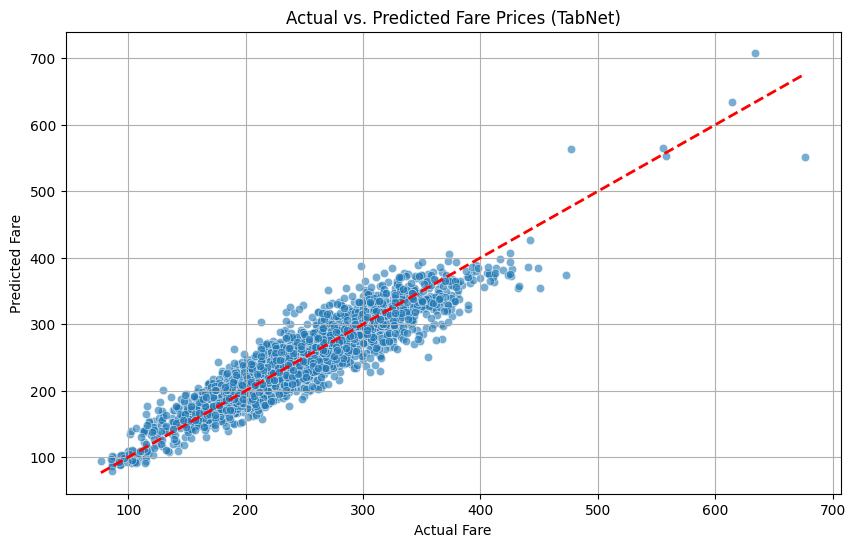

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inverse transform y_val and y_pred_tabnet from log scale
y_pred_tabnet_train = tabnet_model.predict(X_train)

y_val_original = np.expm1(y_val)
y_pred_tabnet_original = np.expm1(y_pred_tabnet)

# Evaluate the model
mae_tabnet = mean_absolute_error(y_val_original, y_pred_tabnet_original)
mse_tabnet = mean_squared_error(y_val_original, y_pred_tabnet_original)
rmse_tabnet = np.sqrt(mse_tabnet)
r2_tabnet = r2_score(y_val_original, y_pred_tabnet_original)

print(f"\nTabNet Model Evaluation:\n")
print(f"Mean Absolute Error (MAE): {mae_tabnet:.2f}")
print(f"Mean Squared Error (MSE): {mse_tabnet:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tabnet:.2f}")
print(f"R-squared (R2): {r2_tabnet:.2f}")

# Visualize predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_original.flatten(), y=y_pred_tabnet_original.flatten(), alpha=0.6)
plt.plot([y_val_original.min(), y_val_original.max()], [y_val_original.min(), y_val_original.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Prices (TabNet)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access global feature importances
feature_importances = tabnet_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': ALL_FEATURES,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nGlobal Feature Importances (TabNet):\n")
print(importance_df.head(10))



Global Feature Importances (TabNet):

               Feature  Importance
4              nsmiles    0.256569
6             large_ms    0.106977
2          carrier_low    0.094678
17  TotalPerPrem_city2    0.081167
14  TotalPerPrem_city1    0.071040
3                 Year    0.066120
5           passengers    0.060333
7                lf_ms    0.053656
8       city1_gdp_2018    0.041867
1           carrier_lg    0.040633


**Reasoning**:
Now, I will visualize the top 10 most important features using a horizontal bar plot to provide a clear graphical representation of their influence on the model's predictions, ensuring proper labels and a title.



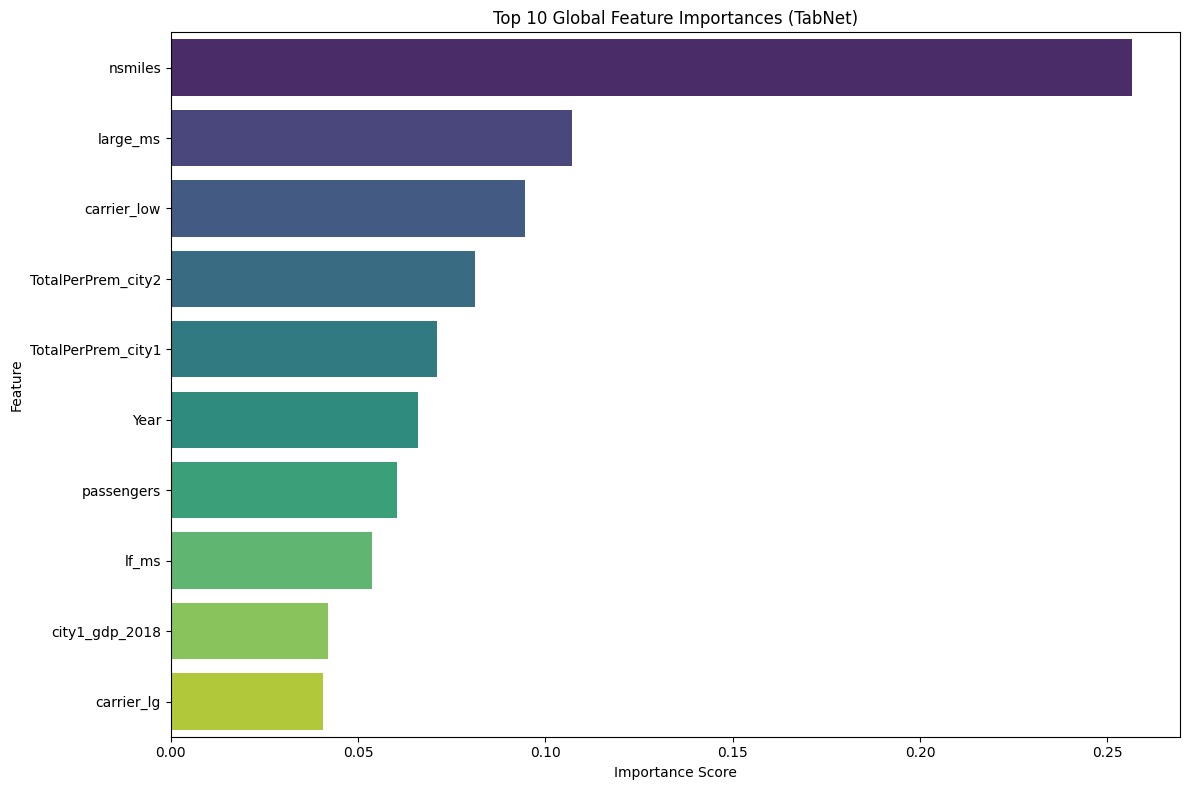

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Global Feature Importances (TabNet)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Model Comparison Metrics:


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,22.864325,893.803260,29.896543,0.783740
1,Neural Network,16.096985,452.625916,21.275007,0.890485
2,TabNet,18.409988,573.050425,23.938472,0.861347


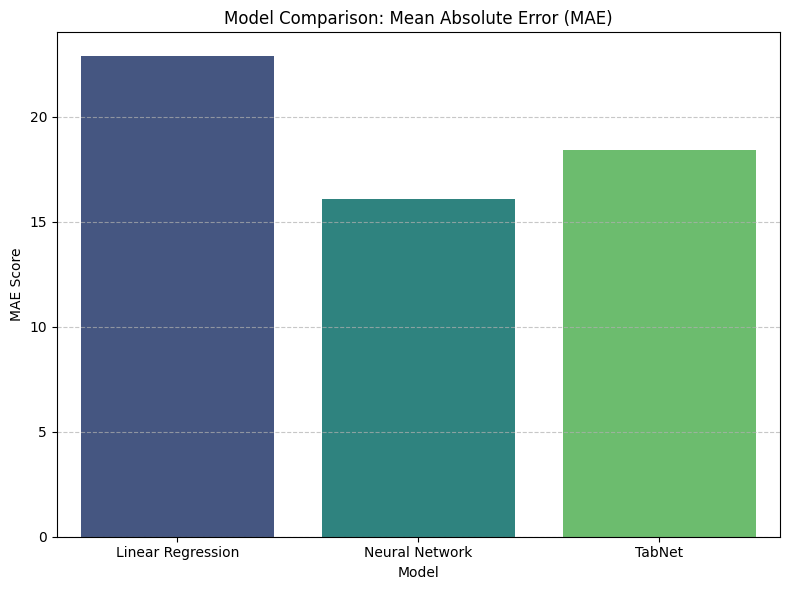

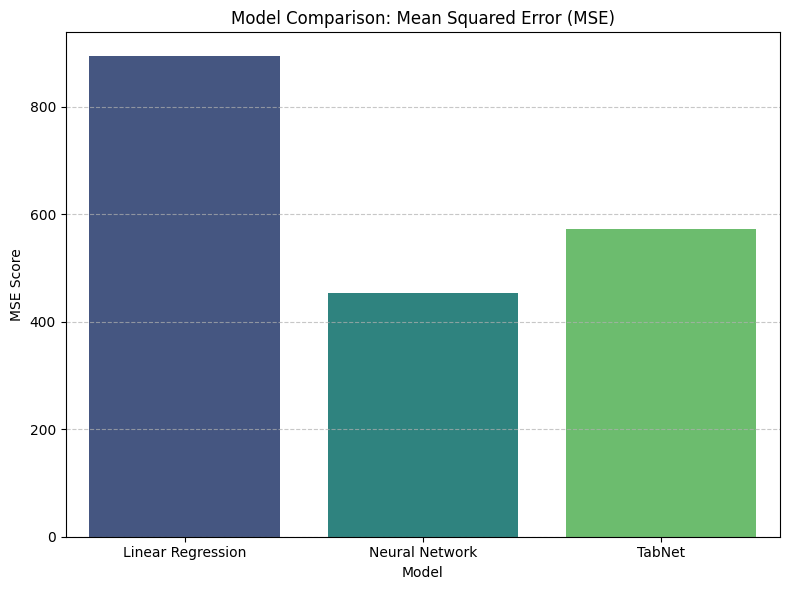

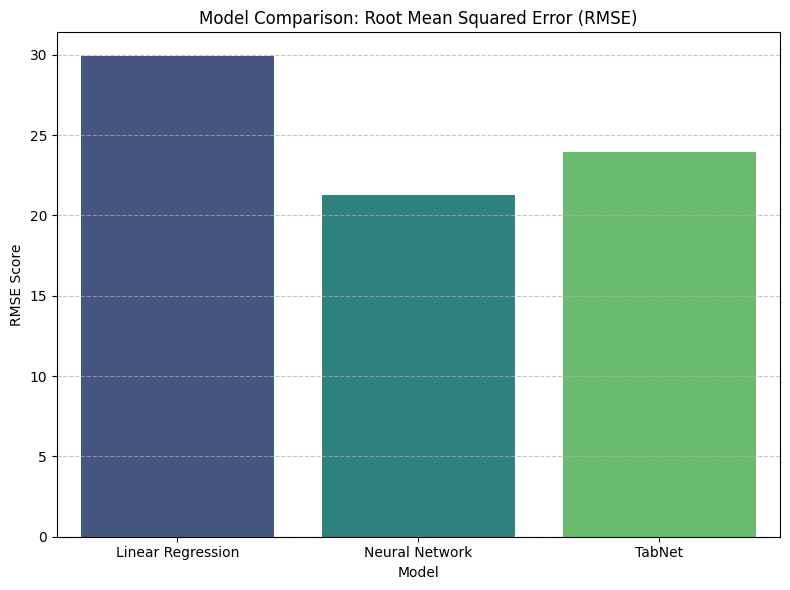

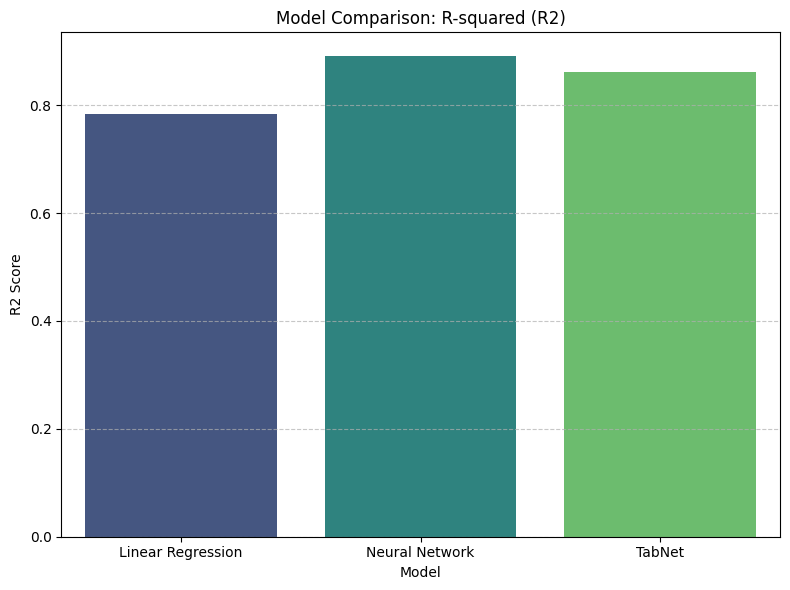

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gather metrics for each model
metrics_data = {
    'Model': ['Linear Regression', 'Neural Network', 'TabNet'],
    'MAE': [mae, mae_nn, mae_tabnet],
    'MSE': [mse, mse_nn, mse_tabnet],
    'RMSE': [rmse, rmse_nn, rmse_tabnet],
    'R2': [r2, r2_nn, r2_tabnet]
}

metrics_df = pd.DataFrame(metrics_data)

print("Model Comparison Metrics:")
display(metrics_df)

# Plotting function for comparison
def plot_metric_comparison(df, metric, title, y_label):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y=metric, data=df, palette='viridis', hue='Model', legend=False)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Model')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot MAE
plot_metric_comparison(metrics_df, 'MAE', 'Model Comparison: Mean Absolute Error (MAE)', 'MAE Score')

# Plot MSE
plot_metric_comparison(metrics_df, 'MSE', 'Model Comparison: Mean Squared Error (MSE)', 'MSE Score')

# Plot RMSE
plot_metric_comparison(metrics_df, 'RMSE', 'Model Comparison: Root Mean Squared Error (RMSE)', 'RMSE Score')

# Plot R2
plot_metric_comparison(metrics_df, 'R2', 'Model Comparison: R-squared (R2)', 'R2 Score')